# Case Study on Measures of Central Tendency and Dispersion
  An Institution wishes to find out their student’s ability in maths, reading and
writing skills. The Institution wants to do an exploratory study to check the
following information.
1. Find out how many males and females participated in the test.
2. What do you think about the students' parental level of education?
3. Who scores the most on average for math, reading and writing based on
   * Gender
   * Test preparation course
4. What do you think about the scoring variation for math, reading and writing based on
   * Gender
   * Test preparation course
5. The management needs your help to give bonus points to the top 25% ofstudents based on their maths score, so how will you    help the management to achieve this.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
stu=pd.read_csv('StudentsPerformance.csv')
stu.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [10]:
stu.info()## RANGE INDICATES THAT THERE ARE THOUSAND VALUES , ALSO IT CONTAINS 8 FEATURES,CONTAINING BOTH OBJECT AND INTEGER DATATYPES.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
stu.isna().sum()## INDICATES THAT THERE IS NO NULL VALUES.

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## 1. Find out how many males and females participated in the test.

In [11]:
stu['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

Text(0.5, 1.0, ' GENDER WISE  PARTICIPATION')

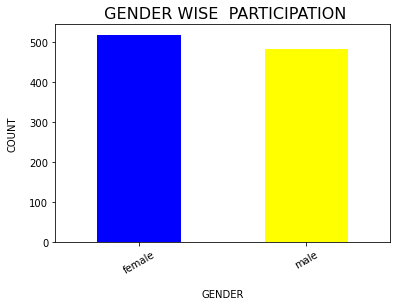

In [13]:
figsize=(8,6)
stu['gender'].value_counts().plot(kind='bar',rot=30,color=['blue','yellow'])
plt.xlabel("GENDER",labelpad=14)
plt.ylabel("COUNT",labelpad=12)
plt.title(" GENDER WISE  PARTICIPATION",fontsize=16)

## INFERENCES:-
    Female participation (518) is more than male (482) in the test. 

## 2. What do you think about the students' parental level of education?

                    parental level of education
some college                                226
associate's degree                          222
high school                                 196
some high school                            179
bachelor's degree                           118
master's degree                              59


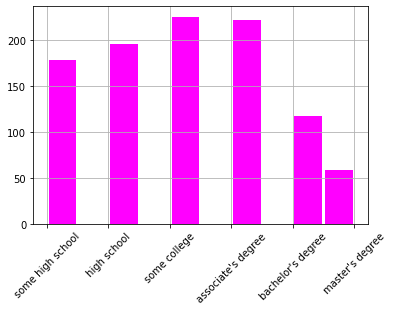

In [21]:
print(stu['parental level of education'].value_counts().to_frame())
plt.hist(stu['parental level of education'], color=['magenta'],rwidth=0.9)
plt.xticks(rotation=45)
plt.grid()
plt.show()

## INFERENCES:-
   Out of the total education level,
   1. Mostly have degree level education.
   2. Arranging the qualification in ascending order, we have
       * master degree> bachelor degree> some high school>high school>associate degree>some college.
   3. About 5% of the parents have masters education.

## 3. Who scores the most on average for math, reading and writing based on
     3.1. ● Gender

In [23]:
print('Maths score:\n', stu.groupby('gender')['math score'].describe(),'\n')
print('Reading score:\n', stu.groupby('gender')['reading score'].describe(),'\n')
print('Writing score:\n', stu.groupby('gender')['writing score'].describe())

Maths score:
         count       mean        std   min   25%   50%   75%    max
gender                                                            
female  518.0  63.376448  16.029928   0.0  54.0  65.0  74.0  100.0
male    482.0  68.821577  14.556411  27.0  59.0  69.0  79.0  100.0 

Reading score:
         count       mean        std   min    25%   50%   75%    max
gender                                                             
female  518.0  72.590734  14.411018  17.0  63.25  73.0  83.0  100.0
male    482.0  65.545643  14.149594  23.0  56.00  66.0  76.0  100.0 

Writing score:
         count       mean        std   min   25%   50%   75%    max
gender                                                            
female  518.0  72.467181  14.844842  10.0  64.0  74.0  82.0  100.0
male    482.0  63.446058  14.227225  15.0  53.0  64.0  74.0  100.0


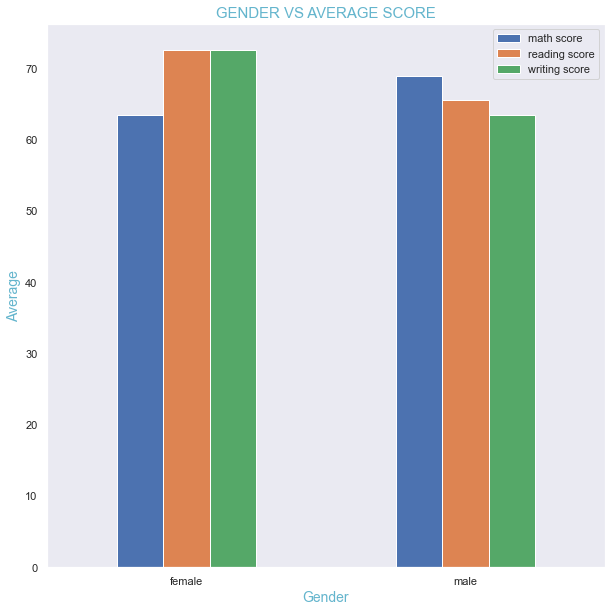

In [26]:
stu.groupby('gender')[['math score', 'reading score', 'writing score']].mean().plot(kind='bar', figsize=(10,10))
plt.xticks(rotation=0)
plt.title('GENDER VS AVERAGE SCORE',c='c',fontsize=15)
plt.xlabel('Gender',c='c',fontsize=14)
plt.ylabel('Average',c='c',fontsize=14)
plt.grid()
plt.show()

## INFERENCES:-
   1. Based on  maths score male perform better than females.
   2. With respect to reading and writing female average is better than male average.
   3. Overall based on gender, females perform better than males.

##  Who scores the most on average for math, reading and writing based on:
    3.2 Test preparation course

In [27]:
stu.groupby('test preparation course')['math score'].describe()

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,69.96648,14.521847,23.0,61.0,70.0,79.0,100.0
none,642.0,63.78972,15.705689,0.0,54.0,64.0,74.0,100.0


In [29]:
stu.groupby('test preparation course')['reading score'].describe()

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,74.175978,13.537572,37.0,66.0,75.0,84.0,100.0
none,642.0,66.417445,14.608896,17.0,57.0,67.0,76.0,100.0


In [30]:
stu.groupby('test preparation course')['writing score'].describe()

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,74.684358,13.236412,36.0,67.0,76.0,83.75,100.0
none,642.0,64.457944,15.041667,10.0,54.0,65.0,74.00,100.0


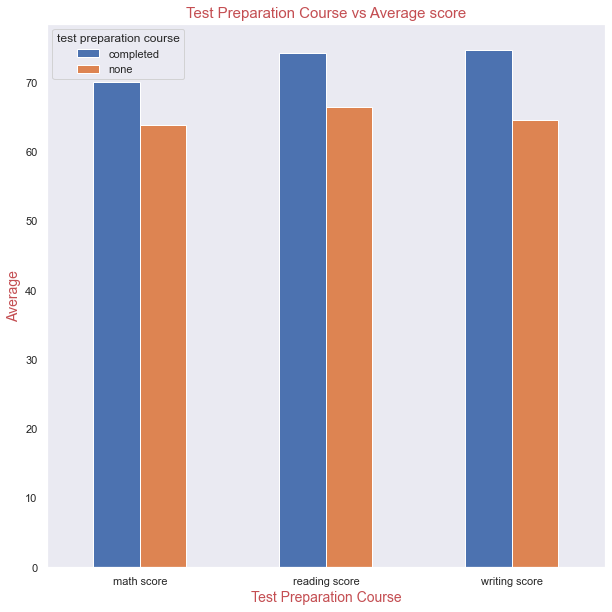

In [37]:
stu.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().T.plot(kind='bar',
                                                                                                       figsize=(10,10))
plt.xticks(rotation=0)
plt.title('Test Preparation Course vs Average score',c='r',fontsize=15)
plt.xlabel('Test Preparation Course',c='r',fontsize=14)
plt.ylabel('Average',c='r',fontsize=14)
plt.grid()
plt.show()

## INFERENCES:-
    Based on test preparation course,
       Avearge of completed course are more than none completed.
     

## 4. What do you think about the scoring variation for math, reading and writing based on:
    4.1 Gender

In [41]:
stu.groupby('gender')['math score'].describe()##  METHOD -1

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,63.376448,16.029928,0.0,54.0,65.0,74.0,100.0
male,482.0,68.821577,14.556411,27.0,59.0,69.0,79.0,100.0


In [39]:
stu.groupby('gender')['reading score'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.590734,14.411018,17.0,63.25,73.0,83.0,100.0
male,482.0,65.545643,14.149594,23.0,56.00,66.0,76.0,100.0


In [40]:
stu.groupby('gender')['writing score'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.467181,14.844842,10.0,64.0,74.0,82.0,100.0
male,482.0,63.446058,14.227225,15.0,53.0,64.0,74.0,100.0


In [45]:
stu.groupby('gender')['math score'].std() ## METHOD -2

gender
female    16.029928
male      14.556411
Name: math score, dtype: float64

In [46]:
stu.groupby('gender')['reading score'].std()

gender
female    14.411018
male      14.149594
Name: reading score, dtype: float64

In [47]:
stu.groupby('gender')['writing score'].std()

gender
female    14.844842
male      14.227225
Name: writing score, dtype: float64

## INFERENCES:-
   1. We can see more variance in math score baesd on gender.
   2. Female variance is more visible than in male scoring.

## 4. What do you think about the scoring variation for math, reading and writing based on: 
    4.2 Test preparation course

In [48]:
stu.groupby('test preparation course')['math score'].std()

test preparation course
completed    14.521847
none         15.705689
Name: math score, dtype: float64

In [49]:
stu.groupby('test preparation course')['reading score'].std()

test preparation course
completed    13.537572
none         14.608896
Name: reading score, dtype: float64

In [50]:
stu.groupby('test preparation course')['writing score'].std()

test preparation course
completed    13.236412
none         15.041667
Name: writing score, dtype: float64

## INFERENCES:-
    Low score variation in course completed than course not completed.

## 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this?

In [54]:
stu.sort_values(by='math score',ascending=False).head(250)## COMPLETELY SORTED LIST BASED ON MATH SCORE .USING THIS WE CAN HAND PICK STUDENTS.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77
855,male,group E,associate's degree,free/reduced,completed,77,69,68
854,male,group D,some high school,standard,completed,77,68,69
853,male,group D,associate's degree,free/reduced,none,77,78,73


In [53]:
stu['math score'].describe().to_frame()

,math score
count,1000.000000
mean,66.001000
std,15.569567
min,0.000000
25%,57.000000
50%,66.000000
75%,77.000000
max,100.000000


## INFERENCES:-
    Using the above quartile method , we can find the top 25 students i.e, above 77 math score, so that we may not miss any deserving students.

### KARUNNIA MENON M, DSA NORKA ,BATCH-3